In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 1.8 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -1
MAX_VALUE = 1
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np
def sumPowell(x):
  sumY = 0
  for index, xValue in enumerate(x, 1):    
    absX = np.absolute(xValue) 
    powerX = np.power(xValue, index + 1)
    sumY += powerX   
  return (sumY,)
  #return (sum(x),)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", sumPowell)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg     	std     	min      	max    
0  	30    	0.919555	0.833261	-0.821896	2.50404
1  	184   	0.0700478	0.589863	-1.01606 	1.57407
2  	177   	-1.01867 	3.33894 	-18.8576 	0.284068
3  	186   	-0.631347	0.31042 	-1.10361 	0.246506
4  	182   	-0.914033	0.285712	-1.9424  	-0.628443
5  	180   	-1.33918 	0.40536 	-2.04778 	-0.800552
6  	178   	-1.62716 	0.433728	-3.31632 	-0.808505
7  	183   	-36.239  	101.854 	-341.747 	-1.31156 
8  	180   	-82.7948 	142.896 	-341.871 	-1.66383 
9  	186   	-187.008 	165.479 	-341.926 	-1.9424  
10 	182   	-286.956 	122.731 	-342.062 	-12.1826 
11 	177   	-341.933 	0.101507	-342.062 	-341.629 
12 	184   	-343.047 	5.62467 	-373.336 	-341.926 
13 	177   	-345.181 	9.4112  	-373.453 	-341.996 
14 	175   	-390.473 	208.808 	-1512.31 	-342.043 
15 	180   	-478.54  	348.595 	-1543.72 	-342.051 
16 	174   	-835.275 	565.715 	-1543.75 	-373.336 
17 	182   	-1337.17 	431.222 	-1543.75 	-373.453 
18 	186   	-1539.51 	10.731  	-1543.75 	-1511.66 
19 	175   

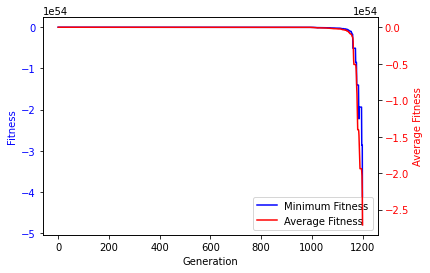

gen	nevals	avg     	std     	min      	max    
0  	30    	0.944535	0.595797	-0.152667	2.27848
1  	181   	0.218689	0.464023	-0.544727	1.36   
2  	171   	-0.322595	0.467256	-2.45936 	0.336656
3  	178   	-1.61614 	3.74268 	-21.3054 	0.016951
4  	178   	-3.88375 	6.08156 	-22.1182 	-0.470159
5  	187   	-9.75684 	9.06775 	-22.1182 	-1.21097 
6  	183   	-18.622  	6.92794 	-22.8835 	-2.46489 
7  	187   	-21.3652 	3.35122 	-23.1365 	-3.58429 
8  	185   	-25.6163 	17.7482 	-121.159 	-21.5191 
9  	178   	-88.7664 	302.084 	-1707.75 	-21.675  
10 	180   	-101.245 	301.149 	-1708.56 	-22.6626 
11 	176   	-247.758 	489.117 	-1709.32 	-22.8835 
12 	188   	-710.394 	760.301 	-1709.32 	-121.715 
13 	181   	-1285.75 	701.308 	-1709.33 	-122.501 
14 	178   	-1693.61 	83.0361 	-1709.33 	-1246.45 
15 	180   	-252037  	1.34806e+06	-7.51155e+06	-1708.6  
16 	182   	-1.00302e+06	2.55285e+06	-7.51155e+06	-1709.32 
17 	175   	-4.00696e+06	3.74657e+06	-7.51155e+06	-1709.33 
18 	188   	-8.38558e+06	7.72587e+06	-

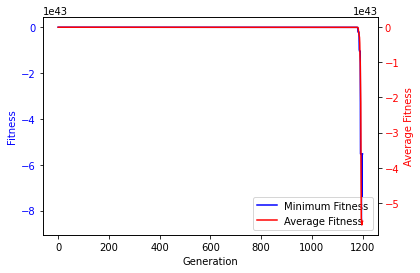

gen	nevals	avg     	std     	min      	max    
0  	30    	0.959057	0.748879	-0.581257	2.30204
1  	185   	0.343457	0.571856	-0.680177	1.65935
2  	185   	-0.245501	0.36598 	-0.873905	0.588466
3  	181   	-0.520755	0.300786	-1.2608  	0.0519273
4  	184   	-0.904647	0.286802	-1.41556 	-0.471925
5  	183   	-1.28086 	0.272972	-1.91748 	-0.680177
6  	176   	-1.58237 	0.415561	-3.25021 	-1.10995 
7  	179   	-1.94284 	0.42856 	-3.25021 	-1.2608  
8  	188   	-2.36391 	0.56695 	-3.95089 	-1.91748 
9  	182   	-2.7671  	0.654538	-3.95089 	-1.96148 
10 	181   	-3.66684 	0.973387	-7.13435 	-2.14982 
11 	179   	-4.53466 	1.12594 	-7.47123 	-3.12102 
12 	181   	-4.81135 	0.932725	-7.20572 	-3.95089 
13 	177   	-5.60681 	1.10305 	-9.03809 	-4.22942 
14 	173   	-7.18338 	2.97586 	-21.6734 	-4.62166 
15 	172   	-9.96785 	4.88897 	-22.2375 	-5.88613 
16 	179   	-16.177  	6.44279 	-26.416  	-8.37895 
17 	186   	-34.909  	49.3651 	-218.912 	-10.6288 
18 	182   	-66.9844 	76.2579 	-218.912 	-22.2375 
19 	177   

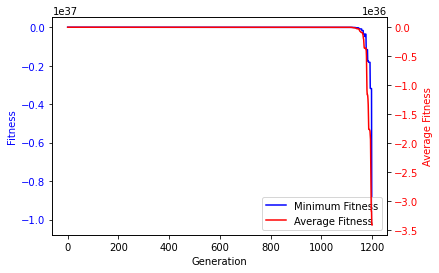

gen	nevals	avg     	std     	min      	max    
0  	30    	0.862849	0.811506	-0.932218	2.97973
1  	176   	0.181994	0.521754	-1.00049 	1.09004
2  	188   	-0.161595	0.332578	-1.00049 	0.62199
3  	176   	-0.411685	0.313851	-1.00049 	0.155237
4  	180   	-0.869477	0.574585	-2.8451  	-0.306889
5  	178   	-1.28935 	0.800028	-3.56062 	-0.622743
6  	182   	-1.4597  	0.879009	-3.49412 	-0.660954
7  	179   	-2.1578  	1.03084 	-3.68504 	-0.913772
8  	177   	-3.29212 	0.507022	-3.8993  	-1.18623 
9  	184   	-3.6781  	0.181819	-4.06117 	-3.1394  
10 	181   	-3.84962 	0.138753	-4.12628 	-3.61798 
11 	179   	-3.99672 	0.109105	-4.12628 	-3.79613 
12 	183   	-26.2983 	119.639 	-670.575 	-3.8993  
13 	173   	-137.916 	267.584 	-685.322 	-4.07394 
14 	174   	-726.167 	2404.32 	-13555.8 	-4.12628 
15 	184   	-2740.49 	4843.73 	-13570.8 	-4.1263  
16 	184   	-5834.07 	6308.96 	-13570.8 	-667.342 
17 	175   	-10989.6 	5152    	-13570.8 	-685.488 
18 	181   	-13570   	2.71414 	-13570.8 	-13556.1 
19 	184   	-

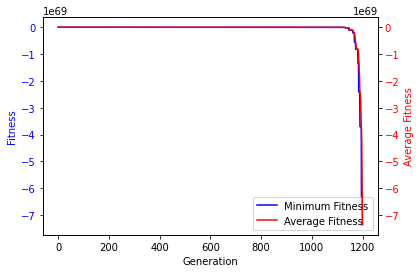

gen	nevals	avg     	std     	min      	max    
0  	30    	0.595547	0.677311	-0.839234	1.96867
1  	178   	-0.120566	0.588129	-1.56622 	1.02612
2  	181   	-0.672503	0.667268	-3.0937  	0.176682
3  	177   	-1.31208 	0.722636	-2.7038  	-0.0539875
4  	177   	-1.92186 	0.635386	-3.19947 	-0.439367 
5  	179   	-2.44559 	0.538319	-3.44836 	-1.67903  
6  	189   	-3.83073 	4.67118 	-28.8986 	-2.12651  
7  	186   	-9.6434  	17.4599 	-90.8524 	-2.70599  
8  	183   	-22.5507 	25.847  	-90.8524 	-3.00977  
9  	180   	-44.2546 	31.4916 	-117.655 	-3.55012  
10 	183   	-76.958  	32.3195 	-117.345 	-29.2963  
11 	173   	-136.325 	148.468 	-685.916 	-29.4205  
12 	179   	-204.845 	251.402 	-975.606 	-91.3965  
13 	169   	-322.442 	351.577 	-1063.55 	-91.4905  
14 	186   	-601.173 	406.838 	-1063.55 	-117.655  
15 	182   	-846.809 	338.377 	-1063.55 	-117.553  
16 	176   	-1103.71 	178.384 	-1877.51 	-975.504  
17 	182   	-1218.45 	311.9   	-1877.84 	-1063.26  
18 	178   	-1404.95 	385.61  	-1877.84 	-106

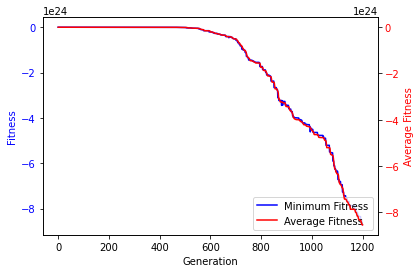

gen	nevals	avg     	std     	min      	max    
0  	30    	0.895742	0.862757	-0.472121	3.27552
1  	185   	0.255809	0.514828	-0.473273	1.21928
2  	173   	-0.119192	0.324898	-0.793609	0.775664
3  	187   	-0.381913	0.255737	-0.793609	0.275908
4  	179   	-0.644876	0.18654 	-1.0427  	-0.276847
5  	184   	-0.789166	0.151371	-1.17005 	-0.377827
6  	177   	-0.935861	0.130652	-1.34118 	-0.697154
7  	179   	-1.08889 	0.220458	-1.77608 	-0.784471
8  	185   	-1.22737 	0.230374	-1.77608 	-0.952968
9  	181   	-1.54356 	0.83265 	-5.87872 	-1.07279 
10 	176   	-2.02927 	1.2884  	-5.87872 	-1.24771 
11 	179   	-2.72487 	1.57699 	-5.95871 	-1.43358 
12 	182   	-8.61765 	25.6256 	-146.326 	-1.7735  
13 	180   	-23.6359 	48.1172 	-146.326 	-2.07766 
14 	180   	-43.3351 	62.3348 	-148.107 	-3.25472 
15 	178   	-67.2336 	69.5594 	-148.107 	-3.25472 
16 	183   	-116.248 	57.2296 	-151.59  	-7.39925 
17 	186   	-148.843 	2.17521 	-151.59  	-146.125 
18 	176   	-150.518 	1.62726 	-151.591 	-146.559 
19 	178   	

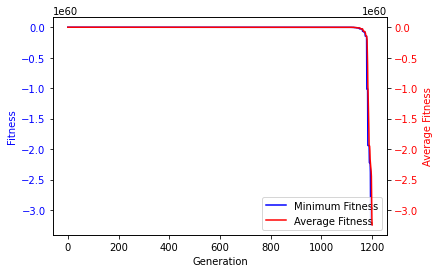

gen	nevals	avg   	std    	min      	max    
0  	30    	1.0132	1.00756	-0.960641	3.57306
1  	176   	0.22779	0.56252	-0.812261	1.48562
2  	183   	-0.166895	0.403806	-1.1805  	0.618865
3  	179   	-0.76618 	0.94993 	-5.55685 	0.0956676
4  	180   	-1.55653 	1.63273 	-5.91516 	-0.301127
5  	179   	-2.57995 	1.9232  	-6.07834 	-0.840971
6  	178   	-3.77303 	2.13892 	-6.85941 	-1.1805  
7  	182   	-5.7286  	1.47852 	-7.22479 	-1.63718 
8  	172   	-6.62318 	0.401768	-7.22479 	-6.08058 
9  	179   	-6.92701 	0.231233	-7.22479 	-6.3042  
10 	191   	-7.10541 	0.113607	-7.22479 	-6.73368 
11 	173   	-9.79757 	14.0429 	-85.4202 	-7.07759 
12 	185   	-9.83109 	14.0365 	-85.4202 	-7.2175  
13 	179   	-17.6512 	26.5812 	-85.4202 	-7.22479 
14 	176   	-40.7537 	38.3858 	-85.4217 	-7.22479 
15 	181   	-64.2996 	34.5419 	-96.1094 	-7.2263  
16 	184   	-88.2989 	13.1064 	-155.557 	-74.8188 
17 	184   	-235.753 	673.319 	-3821.42 	-85.4202 
18 	182   	-223.048 	467.377 	-2629.98 	-85.4202 
19 	178   	-447.81

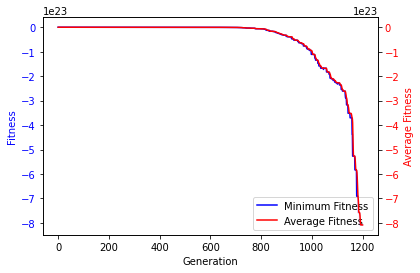

gen	nevals	avg     	std     	min      	max    
0  	30    	0.643727	0.580373	-0.372693	1.94099
1  	186   	0.168113	0.292302	-0.374194	0.943281
2  	177   	-0.116344	0.275314	-0.680305	0.448779
3  	179   	-0.429857	0.329438	-1.06498 	0.193851
4  	175   	-0.938271	0.395141	-1.5604  	-0.373908
5  	182   	-1.26562 	0.294171	-1.9612  	-0.714572
6  	181   	-1.83336 	1.35226 	-9.0254  	-1.29064 
7  	180   	-2.23325 	1.83715 	-9.12598 	-1.43317 
8  	180   	-2.18115 	1.27526 	-9.0254  	-1.59562 
9  	180   	-226.456 	838.706 	-3364.6  	-1.94425 
10 	183   	-787.286 	1421.85 	-3364.95 	-1.96396 
11 	183   	-2244.08 	1584.65 	-3364.95 	-2.12726 
12 	178   	-3028.74 	1007.96 	-3365.19 	-2.58181 
13 	176   	-3364.94 	0.186221	-3365.2  	-3364.53 
14 	177   	-3365.09 	0.0949176	-3365.24 	-3364.85 
15 	177   	-3365.18 	0.0580114	-3365.29 	-3365.08 
16 	174   	-3365.24 	0.032323 	-3365.29 	-3365.17 
17 	178   	-3365.27 	0.0250448	-3365.32 	-3365.22 
18 	181   	-3365.3  	0.0296412	-3365.4  	-3365.24 
19 	1

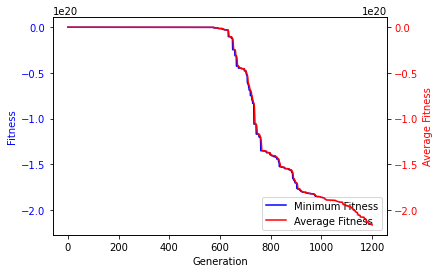

gen	nevals	avg     	std     	min      	max    
0  	30    	0.891802	0.741507	-0.625858	2.16579
1  	179   	0.220493	0.60484 	-0.625858	1.51647
2  	181   	-0.167139	0.419657	-0.877777	0.555898
3  	177   	-0.531118	0.365705	-1.04446 	0.378427
4  	172   	-1.8502  	3.3524  	-17.7029 	-0.385364
5  	173   	-9.6935  	25.2384 	-103.291 	-0.738304
6  	173   	-72.2912 	131.923 	-539.024 	-0.937025
7  	166   	-167.828 	190.616 	-545.758 	-1.58759 
8  	183   	-314.979 	234.481 	-641.424 	-19.1746 
9  	177   	-503.616 	198.009 	-658.249 	-103.319 
10 	184   	-621.232 	48.2621 	-741.632 	-539.024 
11 	167   	-645.365 	39.987  	-741.632 	-545.758 
12 	180   	-668.605 	43.9841 	-741.634 	-641.425 
13 	179   	-705.126 	47.9302 	-741.635 	-642.134 
14 	179   	-738.523 	17.933  	-747.802 	-642.134 
15 	178   	-742.046 	1.53841 	-747.802 	-741.632 
16 	179   	-742.868 	2.46681 	-747.802 	-741.634 
17 	180   	-744.924 	3.07675 	-747.807 	-741.635 
18 	181   	-760.819 	68.8759 	-1130.71 	-741.635 
19 	178   	

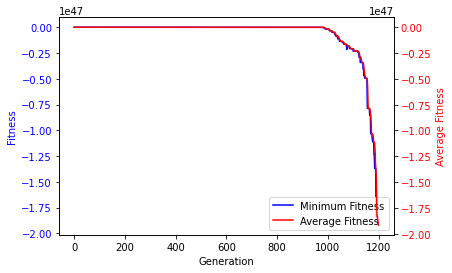

gen	nevals	avg    	std     	min      	max    
0  	30    	1.03641	0.803611	-0.444005	3.26949
1  	182   	0.266342	0.503819	-0.444005	1.13394
2  	178   	-1.97828	9.72774 	-54.3408 	0.608261
3  	184   	-5.85276	16.1859 	-54.5337 	0.204996
4  	176   	-14.9959	23.666  	-54.8557 	-0.421708
5  	184   	-27.7247	26.7784 	-55.7826 	-0.65395 
6  	178   	-43.9491	21.4538 	-55.987  	-0.670991
7  	177   	-55.0351	0.609193	-55.987  	-54.1715 
8  	181   	-55.5242	0.381428	-55.987  	-54.5337 
9  	177   	-55.8497	0.148267	-56.0268 	-55.3169 
10 	182   	-1507.79	7817.61 	-43606.9 	-55.7841 
11 	179   	-1508.05	7817.61 	-43607.2 	-55.9145 
12 	177   	-5863.7 	14804.2 	-43607.2 	-55.9869 
13 	177   	-13123.1	19956.6 	-43608   	-55.9886 
14 	177   	-29091.5	20528.6 	-43608.1 	-59.0947 
15 	178   	-39253  	13064.3 	-43610.1 	-60.0743 
16 	180   	-44992.9	7457.39 	-85152.2 	-43607.1 
17 	179   	-47741.9	11219.3 	-85152.2 	-43608   
18 	183   	-53260.4	15820.5 	-85152.2 	-43608   
19 	180   	-63615.3	18171.9 	-

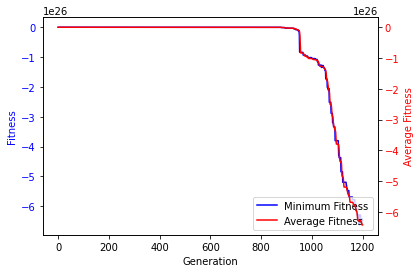

In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()    
    
    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(10):
       main()